# Erdös Bootcamp CoverMyMeds Project Statement

In this challenge we are presenting you with a set of (SIMULATED!) pharmacy claims data-billing claims that were run from a pharmacy to a third-party payer who covers some portion of the prescription drug price on behalf of a patient. Most commonly these third-party payers are the patient insurance plans, but other third parties such as manufacturer discount drug programs can also be run in the same manner as insurance claims to reimburse the pharmacy some portion of the cost. Ultimately, as part of the claim process the amount that the payer reimburses the pharmacy and copayments required of the patient are set by complicated negotiations and contracts between the drug manufacturer, the payer, and the pharmacy. Those negotiations also often cover decisions on what drug claims will ultimately be approved (preferred / non-preferred / non-covered formulary status of each drug) based on the relative discounts that the payer can secure relative to other drugs in the same class that may treat the similar types of medical conditions.

1. As part of this project, we would ask you to build a method of predicting the copayments required of patients ahead of time using this claim billing data. The ultimate initial goal of which would be to provide doctors information about the costs that their patient would expect to see in the pharmacy in case affordability of the medication was an issue. 

2. A secondary goal for the project would be to also provide information about the potential formulary status of the medication on each insurance plan. 

3. And lastly- a stretch goal would be to develop a method of grouping similar medications together so that all the options under a patient’s insurance could be compared together based on their relative formulary statuses and copayment requirements.

In this dataset we have provided a list of pharmacy transactions from a handful of pharmacies taken over the course of a year. These transactions have been designed to incorporate several real effects seen in live pharmacy data- such as deductible phases beginning near the start of the year, lower copays for lower formulary tier drugs, higher rejection rates for the higher tier drugs on the formulary, and different categories of insurance plans. A brief description of the identifiers included in this dataset:

- `tx_date` – The date on which the pharmacy transaction was attempted
- `pharmacy` – The particular pharmacy where the transaction was attempted
- `diagnosis` – The diagnosis of the patient associated with the transaction
- `drug` – The drug that the patient was prescribed that the pharmacy is attempting to bill
- `bin` – The broadest identifier of a patient’s insurance plan (banking identification number)
- `pcn` – An identifier that more narrowly specifies a plan underneath the broader “bin”
- `group` – Another identifier that more narrowly specifies a plan underneath the broader “bin”
- `rejected` – Whether the billing transaction was rejected by the plan
- `patient_pay` – The amount of copayment for which the patient is responsible



In [1]:
import pandas as pd
import numpy as np
import polars as pl

In [2]:
df = pd.read_csv('pharmacy_tx.csv')

In [3]:
df

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93


There are almost 14 million rows.

In [4]:
df2 = pl.read_csv('pharmacy_tx.csv')

In [5]:
df2

tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
str,str,str,str,i64,str,str,bool,f64
"""2022-01-02""","""Pharmacy #6""","""G99.93""","""branded tanoclolol""",725700,"""1UQC""",null,false,13.39
"""2022-01-02""","""Pharmacy #42""","""U60.52""","""branded oxasoted""",664344,null,"""52H8KH0F83K""",false,7.02
"""2022-01-02""","""Pharmacy #37""","""Q85.91""","""branded cupitelol""",725700,"""1UQC""",null,false,13.39
"""2022-01-02""","""Pharmacy #30""","""U60.52""","""generic oxasoted""",571569,"""KB38N""","""6BYJBW""",false,10.84
"""2022-01-02""","""Pharmacy #18""","""N55.01""","""branded mamate""",664344,null,"""ZX2QUWR""",false,47.0
"""2022-01-02""","""Pharmacy #19""","""K32.86""","""branded lalol""",96934,"""S76J7V6""",null,false,13.93
"""2022-01-02""","""Pharmacy #19""","""U60.52""","""branded foxivelule""",725700,"""327CKV""","""IOEAN1DWVV3Y""",false,11.15
"""2022-01-02""","""Pharmacy #27""","""U27.71""","""generic foxivelule""",539437,null,"""1CAHL""",false,7.27
"""2022-01-02""","""Pharmacy #48""","""K32.86""","""generic tafistitrisin""",322463,null,"""HO8HUGL""",false,6.01


In [6]:
unique = []
for i in df.columns:
    unique.append(df[i].unique().size)

unique_values = pd.DataFrame({'Column': df.columns, 'UniqueValues':unique })

In [7]:
unique_values

,Column,UniqueValues
0,tx_date,363
1,pharmacy,58
2,diagnosis,133
3,drug,114
4,bin,12
5,pcn,49
6,group,49
7,rejected,2
8,patient_pay,20437


In [8]:
len(df.loc[df.rejected==True])

1086860

In [9]:
len(df.loc[df.rejected==False])

12823384

In [10]:
print('Percent rejected is', 1086860/13910244) 
print('Percent accepted is', 12823384/13910244)

Percent rejected is 0.0781337839940119
Percent accepted is 0.9218662160059881


<AxesSubplot:>

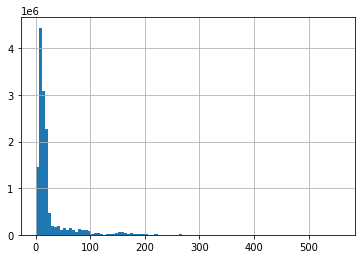

In [11]:
df.patient_pay.hist(bins=100)

In [12]:
df = df.assign(log_patient_pay = np.log(df.patient_pay+1))

<AxesSubplot:>

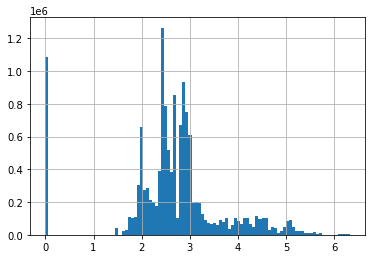

In [13]:
df.log_patient_pay.hist(bins=100)

In [14]:
len(df.loc[df.patient_pay == 0])

1086860

In [17]:
df.loc[df.patient_pay == 0]['rejected'].sum()

1086860

## Note

- `patient_pay==0` is the same as `rejected==True`